In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# # 데이터 불러오기

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/2조_머신러닝_미니프로젝트/res/raw_data/20년 KBO리그.csv',
                 index_col = 0)

df

,연도,팀명,G,W,D,L,WPCT,R,R(A),RD,...,PB,SB,CS,CS%,SBA(R),SB(R),CS(R),SB(R)%,OOB,PKO(R)
0,2001,KIA,133,60,5,68,0.469,683,727,-44,...,10,100,53,34.6,155,92,63,59.4,0,0
1,2001,LG,133,58,8,67,0.464,669,732,-63,...,16,110,55,33.3,154,96,58,62.3,0,0
2,2001,SK,133,60,2,71,0.458,596,640,-44,...,19,106,44,29.3,182,123,59,67.6,0,0
3,2001,두산,133,65,5,63,0.508,732,733,-1,...,12,126,56,30.8,166,132,34,79.5,0,0
4,2001,롯데,133,59,4,70,0.457,718,670,48,...,12,85,58,40.6,159,106,53,66.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2021,두산,144,71,8,65,0.522,738,656,82,...,10,83,48,36.6,118,81,37,68.6,48,11
180,2021,롯데,144,65,8,71,0.478,727,808,-81,...,8,101,44,30.3,91,60,31,65.9,54,8
181,2021,삼성,144,76,9,59,0.563,712,658,54,...,5,61,26,29.9,160,116,44,72.5,47,7
182,2021,키움,144,70,7,67,0.511,722,700,22,...,5,85,35,29.2,123,97,26,78.9,39,3


# # 각 컬럼 추출하기


In [7]:
df_win = df[['W','RD','AVG','OPS','RISP','ERA','WHIP','FPCT']]

df_win

,W,RD,AVG,OPS,RISP,ERA,WHIP,FPCT
0,60,-44,0.278,0.781,0.272,5.01,1.47,0.979
1,58,-63,0.276,0.754,0.280,5.09,1.60,0.980
2,60,-44,0.260,0.728,0.255,4.38,1.41,0.981
3,65,-1,0.276,0.780,0.278,4.96,1.56,0.979
4,59,48,0.280,0.790,0.288,4.68,1.50,0.981
...,...,...,...,...,...,...,...,...
179,71,82,0.268,0.740,0.290,4.26,1.48,0.983
180,65,-81,0.278,0.755,0.286,5.37,1.57,0.984
181,76,54,0.267,0.743,0.265,4.30,1.45,0.983
182,70,22,0.259,0.723,0.279,4.31,1.46,0.976


In [8]:
df_lose = df[['L','ER','E','FPCT','ERA','HBP(A)','BK']]

df_lose

,L,ER,E,FPCT,ERA,HBP(A),BK
0,68,656,107,0.979,5.01,79,3
1,67,670,103,0.980,5.09,69,6
2,71,570,96,0.981,4.38,65,1
3,63,650,109,0.979,4.96,60,0
4,70,609,99,0.981,4.68,61,2
...,...,...,...,...,...,...,...
179,65,601,89,0.983,4.26,73,7
180,71,758,85,0.984,5.37,87,5
181,59,601,88,0.983,4.30,51,3
182,67,605,129,0.976,4.31,80,4


In [9]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

# 차트 전체 폰트 한글(실행후 런타임 재실행 필요)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호도 표시
mpl.rcParams['axes.unicode_minus'] = False

# seaborn 차트 스타일
plt.style.use('seaborn-pastel')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155501 files and di

# # 상관관계 분석하기

## ## 승리 상관관계

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54596 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(

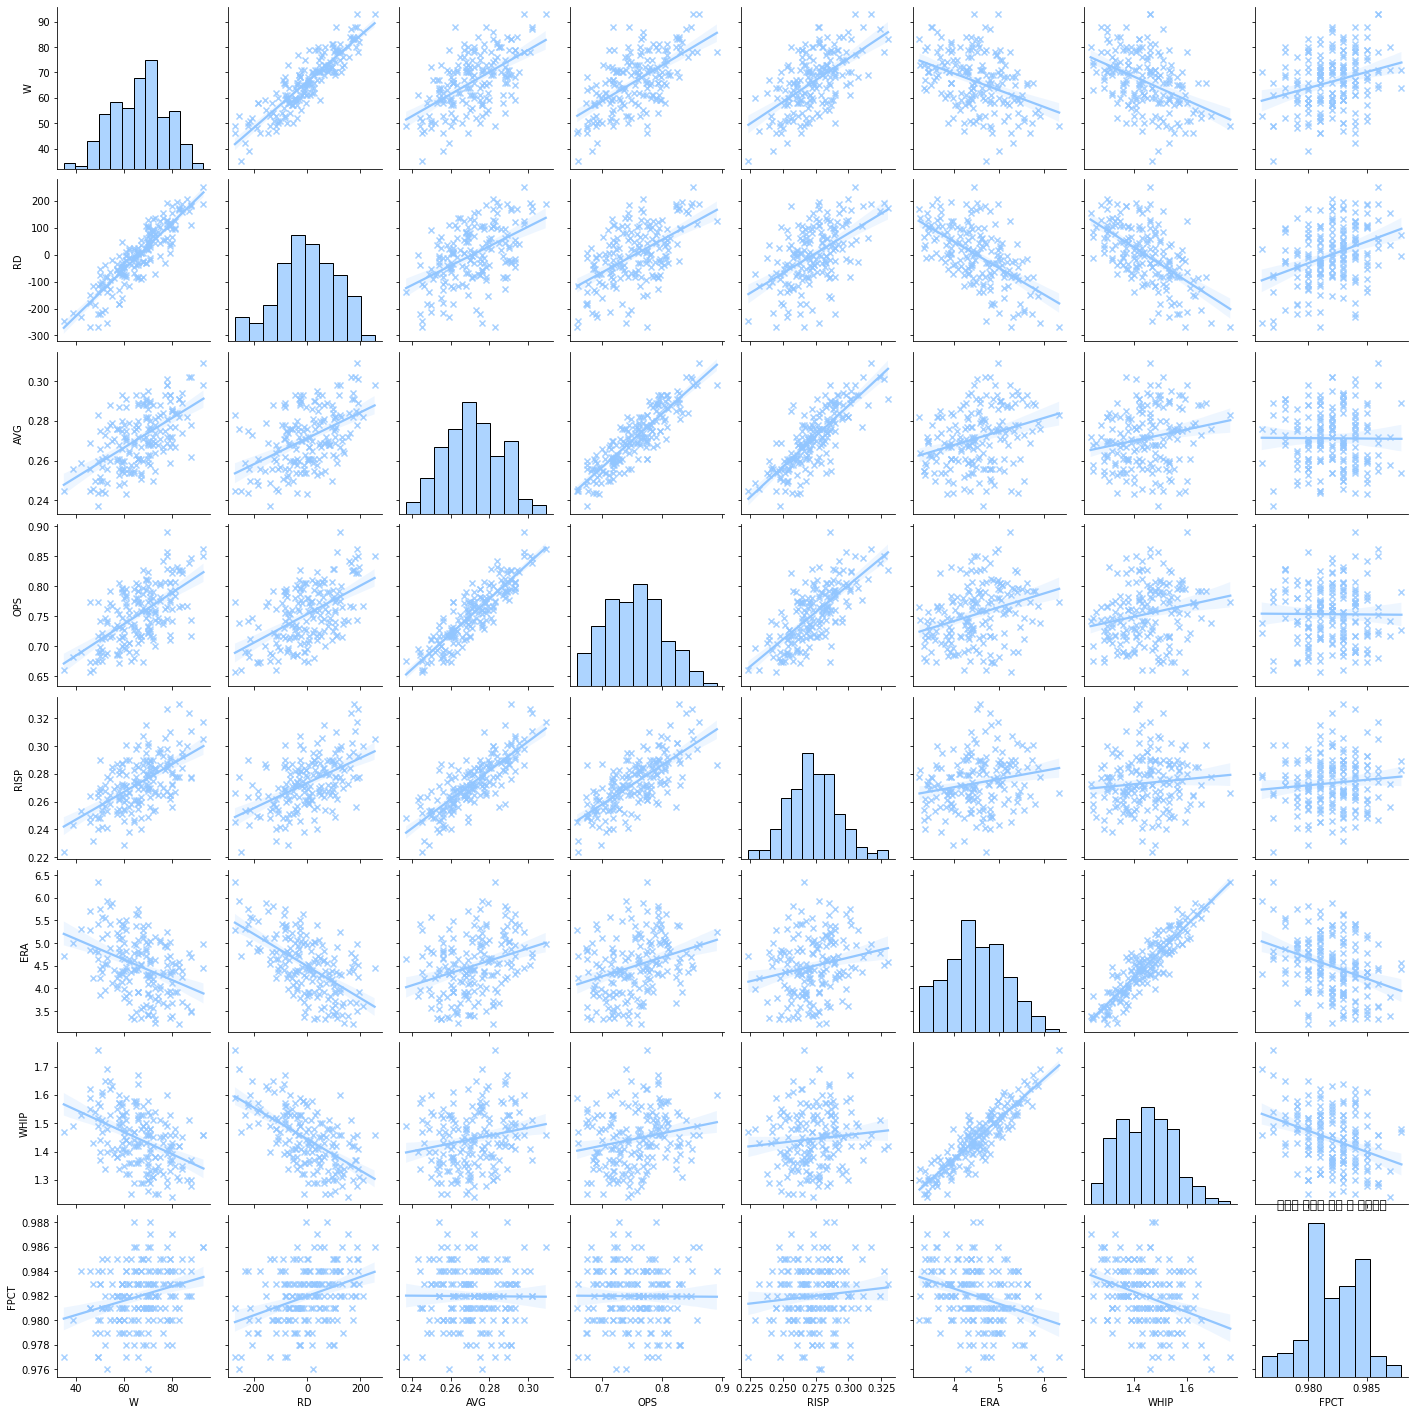

In [10]:
grid_ndf = sns.pairplot(df_win,
                        markers = "x",
                        kind = "reg") 

plt.title('승리에 필요한 지표 간 상관관계')

plt.savefig('승리에 필요한 지표 간 상관관계.png')
plt.show()
plt.close()

## 패배 상관관계 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54056 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54693 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_

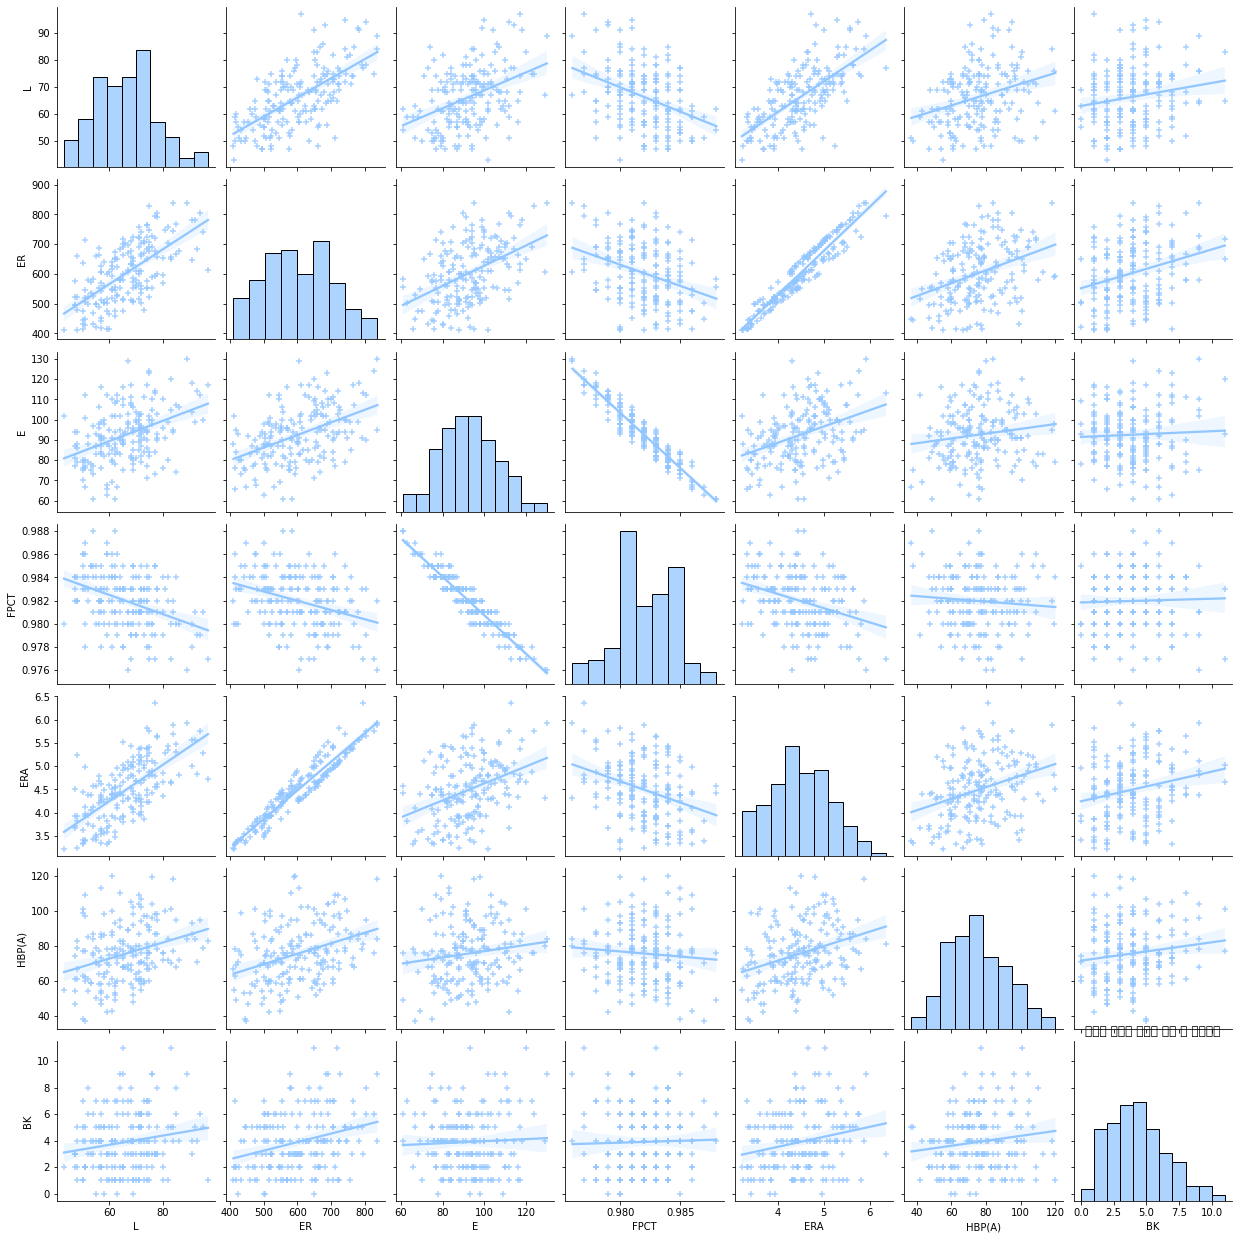

In [11]:
grid_ndf = sns.pairplot(df_lose,
                        markers = "+",
                        kind = "reg")
plt.title('패배에 영향을 미치는 지표 간 상관관계')
plt.savefig('패배에 영향을 미치는 지표 간 상관관계.png')
plt.show()
plt.close()